In [1]:
from body_matrix import load
from body_matrix import infer
from body_matrix import process

video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Body_Matrixes/samples/sample03.mp4", 
    -90, 
    1
)

keypoints_model, keypoints_transform = load.keypoints_model("cpu")
selected_box, keypoints = infer.detect_main_target(
    sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)
selected_kps = process.keypoints_filter(
    ['left_shoulder','right_shoulder'], 
    keypoints
)

segment_model, segment_transform = load.segment_model("cpu")
mask, mask_image, bool_mask = infer.segment_selected_target(
    sample_frame, "cpu", selected_box, 0.99, segment_model, segment_transform
)

segment_area = process.segmentation_area(
    sample_frame, 
    bool_mask
)

Found  3  person in the frame
Distances:  [24.274200439453125, 151.81903076171875, 135.50180053710938]
Areas:  [429583.14185971767, 832.5956870913506, 566.494197089225]
FOCUSES:  [17697.107796865326, 5.484132541974375, 4.180713428483789]
Select keypoint index 0
Found  1  person in the frame
[349.4734191894531, 546.22802734375, 681.9505615234375, 1681.273681640625]
[333.89727783203125, 551.8363037109375, 705.5543212890625, 1707.6953125]
[16.5102817529708]
16.5102817529708 0


In [2]:
print(selected_kps)

{'left_shoulder': [399.44146728515625, 797.2584838867188], 'right_shoulder': [618.4021606445312, 797.2584838867188]}


In [3]:
ls = selected_kps['left_shoulder']
rs = selected_kps['right_shoulder']

lsX = ls[0]
lsY = ls[1]
rsX = rs[0]
rsY = rs[1]

alpha = (rsY - lsY)/(rsX - lsX)
beta = (rsX * lsY - rsY * lsX)/(rsX - lsX)

In [4]:
line_coordinates = []

for idx, position in enumerate(segment_area):
    expectedY = alpha * position[0] + beta
    if position[1] == int(expectedY):
        line_coordinates.append(
            [position[0], position[1]]
        )

In [5]:
line_coordinates 

[[358, 797],
 [359, 797],
 [360, 797],
 [361, 797],
 [362, 797],
 [363, 797],
 [364, 797],
 [365, 797],
 [366, 797],
 [367, 797],
 [368, 797],
 [369, 797],
 [370, 797],
 [371, 797],
 [372, 797],
 [373, 797],
 [374, 797],
 [375, 797],
 [376, 797],
 [377, 797],
 [378, 797],
 [379, 797],
 [380, 797],
 [381, 797],
 [382, 797],
 [383, 797],
 [384, 797],
 [385, 797],
 [386, 797],
 [387, 797],
 [388, 797],
 [389, 797],
 [390, 797],
 [391, 797],
 [392, 797],
 [393, 797],
 [394, 797],
 [395, 797],
 [396, 797],
 [397, 797],
 [398, 797],
 [399, 797],
 [400, 797],
 [401, 797],
 [402, 797],
 [403, 797],
 [404, 797],
 [405, 797],
 [406, 797],
 [407, 797],
 [408, 797],
 [409, 797],
 [410, 797],
 [411, 797],
 [412, 797],
 [413, 797],
 [414, 797],
 [415, 797],
 [416, 797],
 [417, 797],
 [418, 797],
 [419, 797],
 [420, 797],
 [421, 797],
 [422, 797],
 [423, 797],
 [424, 797],
 [425, 797],
 [426, 797],
 [427, 797],
 [428, 797],
 [429, 797],
 [430, 797],
 [431, 797],
 [432, 797],
 [433, 797],
 [434, 797],

In [6]:
if lsX < rsX:
    shoulder_kps = {
        'left_shoulder': line_coordinates[0],
        'right_shoulder': line_coordinates[-1]
    }

elif lsX > rsX:
    shoulder_kps = {
        'left_shoulder': line_coordinates[-1],
        'right_shoulder': line_coordinates[0]
    }

[358, 797]
[656, 797]


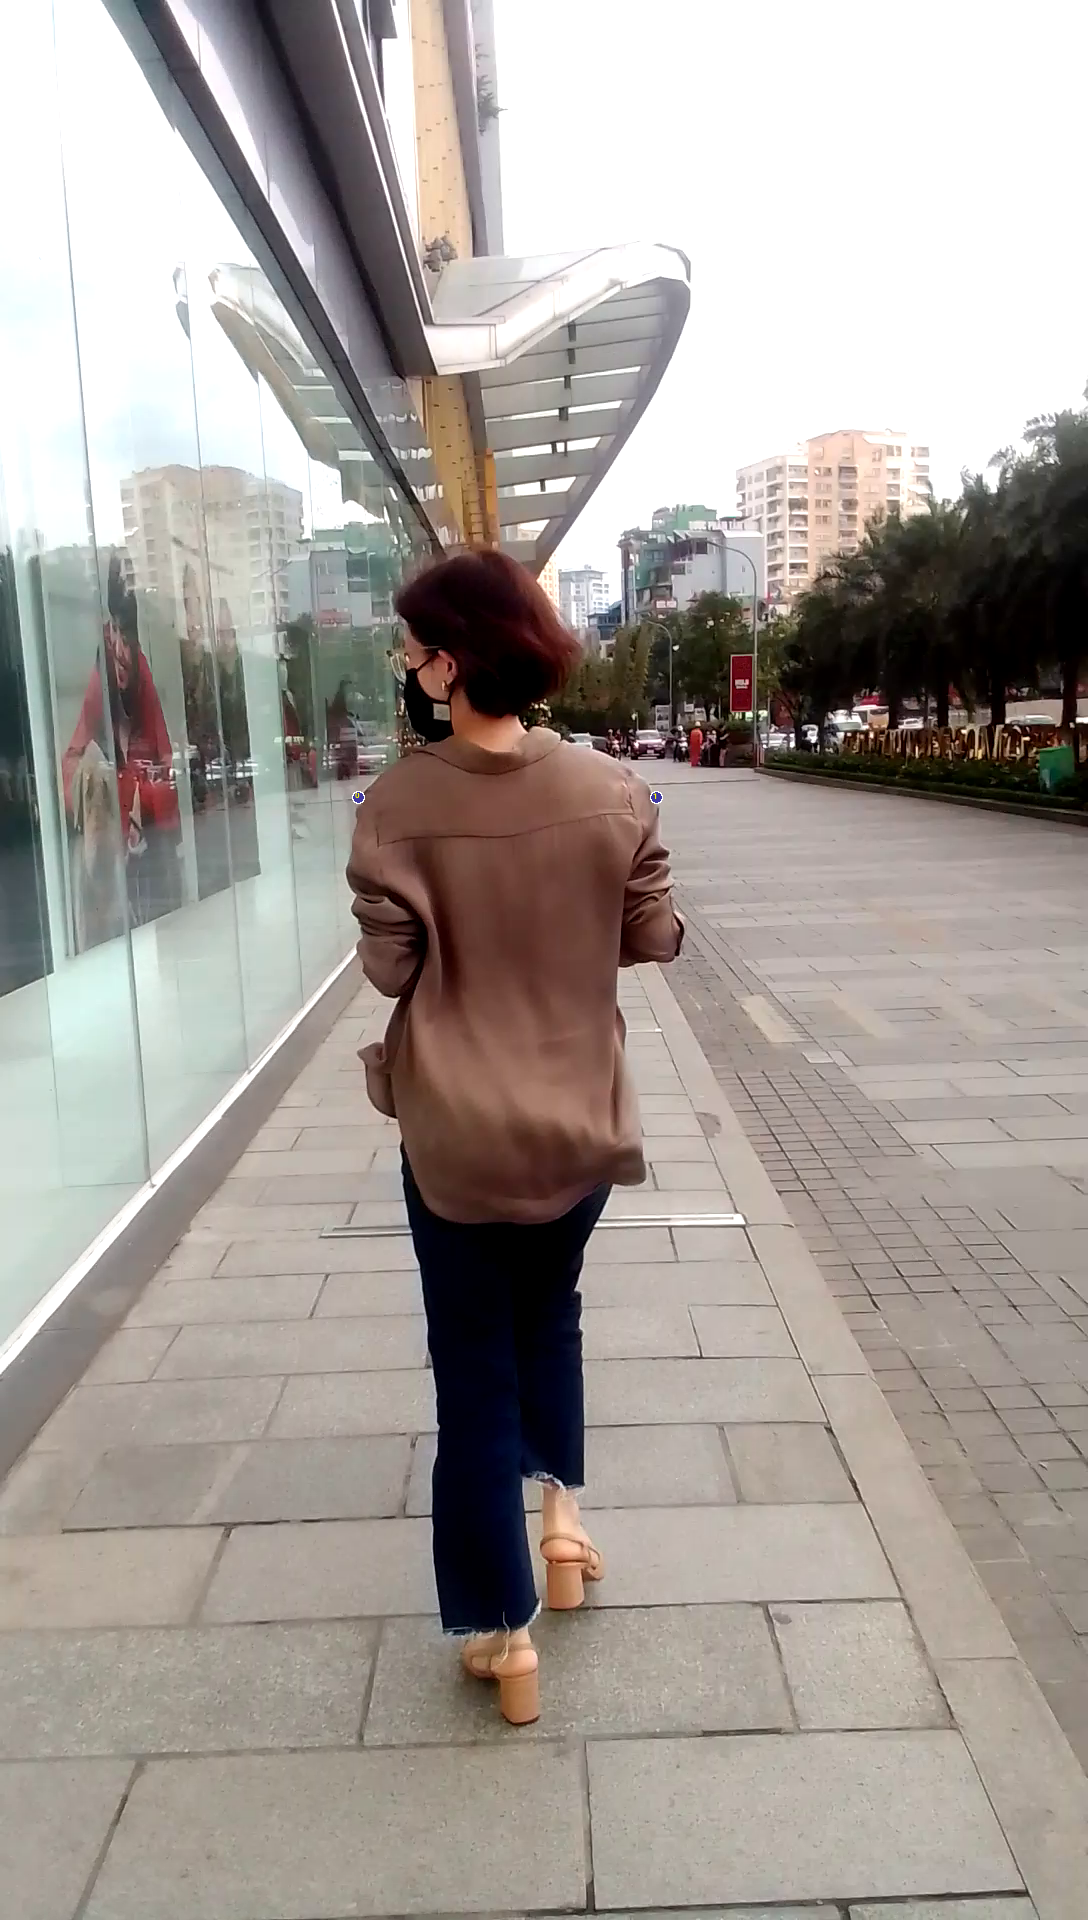

In [7]:
from body_matrix import draw 

output = draw.keypoint_markers(
    coordinates=shoulder_kps,
    image=sample_frame, 
    label_font="/path/Roboto-Bold.ttf"
)
output

In [8]:
from body_matrix import measure

middle_shoulder = measure.find_middle_point(
    shoulder_kps['left_shoulder'], 
    shoulder_kps['right_shoulder']
)

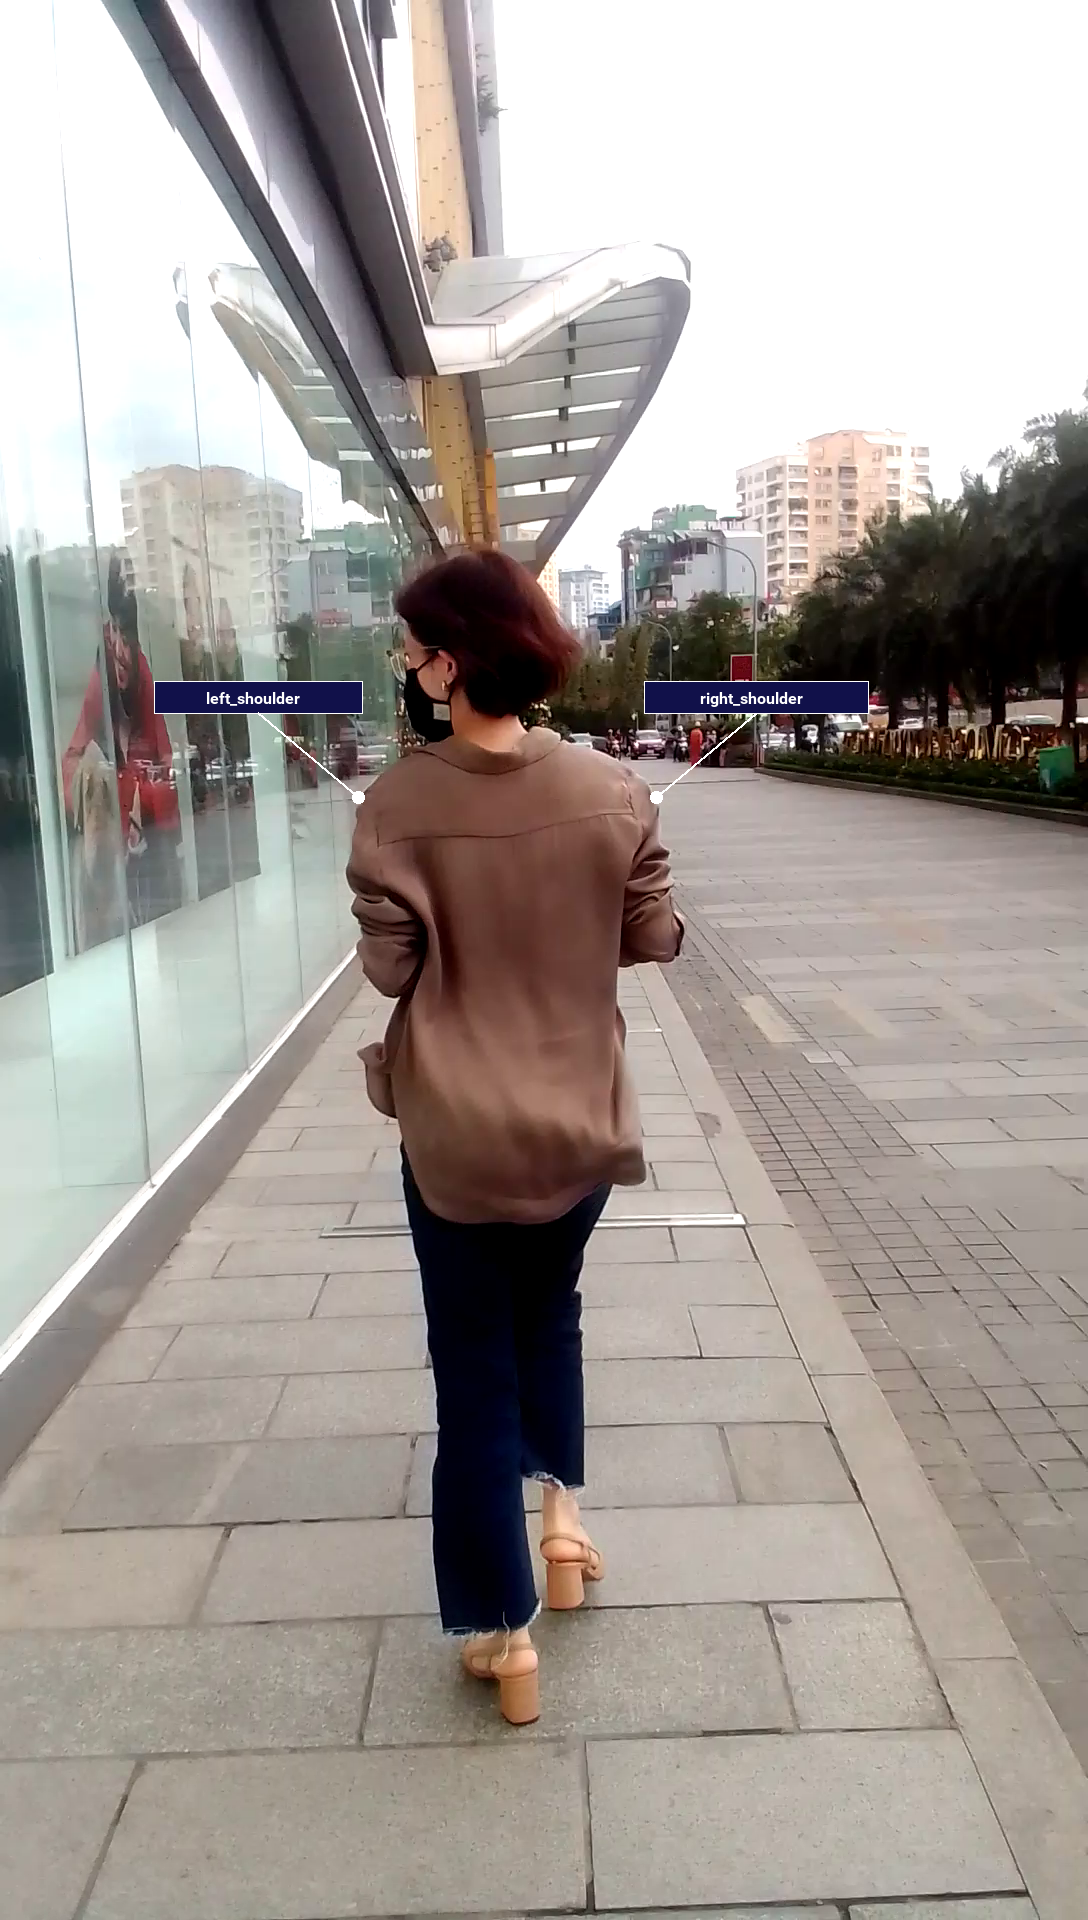

In [9]:
float_sample = sample_frame
for key, value in shoulder_kps.items():
    float_sample = draw.floating_rectangle_label(
        image=float_sample, 
        longitude_coordinate=middle_shoulder[0],
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    ) 
    
float_sample